<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-исследование-таблиц" data-toc-modified-id="Загрузка-и-исследование-таблиц-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и исследование таблиц</a></span></li><li><span><a href="#Анализ-базы-данных" data-toc-modified-id="Анализ-базы-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ базы данных</a></span><ul class="toc-item"><li><span><a href="#Cколько-книг-вышло-после-1-января-2000-года" data-toc-modified-id="Cколько-книг-вышло-после-1-января-2000-года-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cколько книг вышло после 1 января 2000 года</a></span></li><li><span><a href="#Количество-обзоров-и-средняя-оценка-книг" data-toc-modified-id="Количество-обзоров-и-средняя-оценка-книг-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Количество обзоров и средняя оценка книг</a></span></li><li><span><a href="#Издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц" data-toc-modified-id="Издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Издательство, которое выпустило наибольшее число книг толще 50 страниц</a></span></li><li><span><a href="#Автор-с-самой-высокой-средней-оценкой-книг." data-toc-modified-id="Автор-с-самой-высокой-средней-оценкой-книг.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Автор с самой высокой средней оценкой книг.</a></span></li><li><span><a href="#Cреднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок." data-toc-modified-id="Cреднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок.</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

**Анализ базы данных сервиса для чтения книг по подписке**

Наша задача — проанализировать базу данных крупного сервиса для чтения книг по подписке. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

## Загрузка и исследование таблиц

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [3]:
query = ''' SELECT *
            FROM books
        '''
books = pd.io.sql.read_sql(query, con = engine) 
books.info()
books.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336


In [4]:
query = ''' SELECT *
            FROM authors
        '''
authors = pd.io.sql.read_sql(query, con = engine) 
authors.info()
authors.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs


In [5]:
query = ''' SELECT *
            FROM publishers
        '''
publishers = pd.io.sql.read_sql(query, con = engine) 
publishers.info()
publishers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [6]:
query = ''' SELECT *
            FROM ratings
        '''
ratings = pd.io.sql.read_sql(query, con = engine) 
ratings.info()
ratings.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2


In [7]:
query = ''' SELECT *
            FROM reviews
        '''
reviews = pd.io.sql.read_sql(query, con = engine) 
reviews.info()
reviews.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...


In [8]:
books.duplicated().sum()

0

In [9]:
authors.duplicated().sum()

0

In [10]:
publishers.duplicated().sum()

0

In [11]:
ratings.duplicated().sum()

0

In [12]:
reviews.duplicated().sum()

0

Пропусков и дубликатов в данных не обнаружено.

## Анализ базы данных

###  Cколько книг вышло после 1 января 2000 года

In [13]:
query = ''' SELECT COUNT(book_id)
            FROM books
            WHERE publication_date > '2000-01-01'
        '''
pd.io.sql.read_sql(query, con = engine) 

,count
0,819


После 1 января 2000 года вышло 819 книг.

### Количество обзоров и средняя оценка книг

In [14]:
query = '''     
            SELECT  rat.book_id, 
                    COUNT(review_id) AS reviews,
                    ROUND(AVG(rating),2) AS avg_rating                 
            FROM ratings rat LEFT JOIN reviews AS rev ON rat.book_id=rev.book_id   
            GROUP BY rat.book_id
            ;
        '''
rev_rat=pd.io.sql.read_sql(query, con = engine) 
rev_rat

,book_id,reviews,avg_rating
0,652,4,4.50
1,273,4,4.50
2,51,60,4.25
3,951,4,4.00
4,839,28,4.29
...,...,...,...
995,64,52,4.23
996,55,4,5.00
997,148,21,3.43
998,790,4,3.50


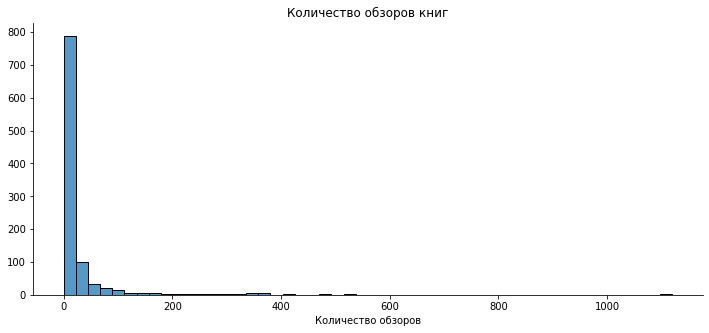

In [15]:
plt.figure(figsize=(12,5))
sns.histplot(x= rev_rat['reviews'], bins=50)
plt.title('Количество обзоров книг')
plt.ylabel(None)
plt.xlabel('Количество обзоров')
sns.despine() 

На большинство книг до 10 обзоров, но есть немного супер популярных книг на которые от 200 до 1000 обзоров.

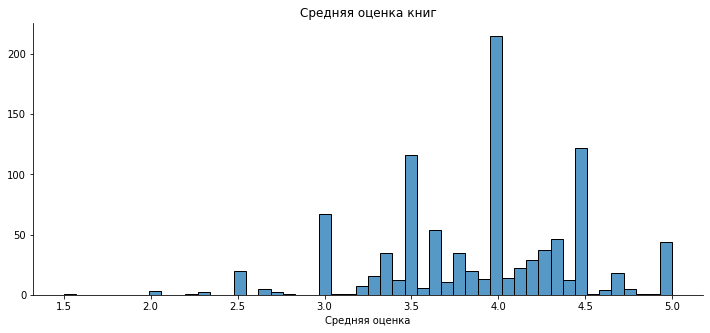

In [16]:
plt.figure(figsize=(12,5))
sns.histplot(x= rev_rat['avg_rating'], bins=50)
plt.title('Средняя оценка книг')
plt.ylabel(None)
plt.xlabel('Средняя оценка')
sns.despine() 

Больше всего книг со средней оценкой 4.

###  Издательство, которое выпустило наибольшее число книг толще 50 страниц 

In [17]:
query = '''     
            SELECT p.publisher_id,
                   publisher,
                   COUNT(book_id)       
            FROM books AS b JOIN publishers AS p ON b.publisher_id=p.publisher_id
            WHERE num_pages>50
            GROUP BY p.publisher_id,
                     publisher
            ORDER BY COUNT(book_id) DESC 
            LIMIT 1        
            ;
        '''
pd.io.sql.read_sql(query, con = engine) 

,publisher_id,publisher,count
0,212,Penguin Books,42


Больше всего книг толще 50 страниц выпустило издательство Penguin Books.

### Автор с самой высокой средней оценкой книг.

In [18]:
query = '''     
            WITH r AS (
                   SELECT book_id,
                          AVG(rating) avg_rating,
                          COUNT(book_id) ratings
                   FROM ratings 
                   GROUP BY book_id)
            SELECT author,
                   AVG(avg_rating)
            FROM books b JOIN authors a ON b.author_id=a.author_id JOIN r ON r.book_id=b.book_id
            WHERE ratings>=50
            GROUP BY a.author_id, author
            ORDER BY AVG(avg_rating) DESC 
            LIMIT 1
           
        '''
pd.io.sql.read_sql(query, con = engine) 

,author,avg
0,J.K. Rowling/Mary GrandPré,4.283844


Автор с самой высокой средней оценкой книг — J.K. Rowling/Mary GrandPré.

### Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [19]:
query = '''     
         WITH rat AS (
                      SELECT username,
                             COUNT(rating_id) AS ratings
                      FROM ratings
                      GROUP BY username),
              rew AS (SELECT COUNT(review_id) AS reviews
                      FROM reviews AS rev RIGHT JOIN rat ON rev.username=rat.username
                      WHERE ratings>50 
                      GROUP BY rat.username)
          SELECT ROUND(AVG(reviews))
          FROM rew
        '''
pd.io.sql.read_sql(query, con = engine) 

,round
0,24.0


 Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок 24.33.
 
 ## Выводы
 
 Мы проанализировали базу данных крупного сервиса для чтения книг по подписке, и выяснили, что:
 - После 1 января 2000 года вышло 819 книг.
 - На большинство книг до 10 обзоров, но есть немного супер популярных книг на которые от 200 до 1000 обзоров.
 - Больше всего книг со средней оценкой 4.
 - Больше всего книг толще 50 страниц выпустило издательство Penguin Books.
 - Автор с самой высокой средней оценкой книг — J.K. Rowling/Mary GrandPré.
 - Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок 24.33.
 
 